In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
from io import StringIO, BytesIO
from visual_genome import api

In [3]:
ids = api.get_all_image_ids()

In [5]:
print(ids[3])

4


In [53]:
# ids = api.GetImageIdsInRange(startIndex=2000, endIndex=2010)
# print(ids)

In [11]:
pic_id = 18
image = api.get_image_data(id=pic_id)
print(image)

id: 18, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K/18.jpg


In [12]:
regions = api.get_region_descriptions_of_image(id=pic_id)
print(regions[0])

id: 4252, x: 664, y: 241, width: 93,height: 126, phrase: man has short hair, image: 18


In [57]:
# graph = api.get_scene_graph_of_image()
# print(graph)

In [13]:
for region in regions:
    print(str(region.id) + " " +str(region.x) + " " + str(region.y) + " " + 
          str(region.width) + " " + str(region.height) + " " +
          str(region.phrase))

4252 664 241 93 126 man has short hair
4253 320 243 188 122 black computer is off
4254 111 350 75 107 a soda bottle has some sodas
4255 305 345 40 57 coke can is on the table
4256 650 329 136 139 man is wearing black tshirt
4257 749 255 50 162 monitor is white and on
4258 357 353 116 50 keyboard is white in colour
4259 448 153 195 126 brown shelf is wooden
4260 650 235 128 128 man is busy working on the computer
4261 180 153 122 144 window is clean and clear
4652 323 244 149 109 There's a black computer monitor
4653 351 355 117 36 The computer keyboard is beige.
4654 79 357 75 96 A mug on the table beside the plastic bottle.
4655 300 349 43 59 A cola on the table.
4656 635 255 161 265 The man is working
4657 17 449 85 74 The computer mouse is on the able.
4658 381 414 160 152 The CPU is under the table
4659 166 341 51 42 There's tissue by the window.
4660 6 344 68 96 There's a lunch bag on the table.
4661 456 130 69 67 A helmet on the shelf
5052 312 236 166 132 A black computer on the 

In [9]:
def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

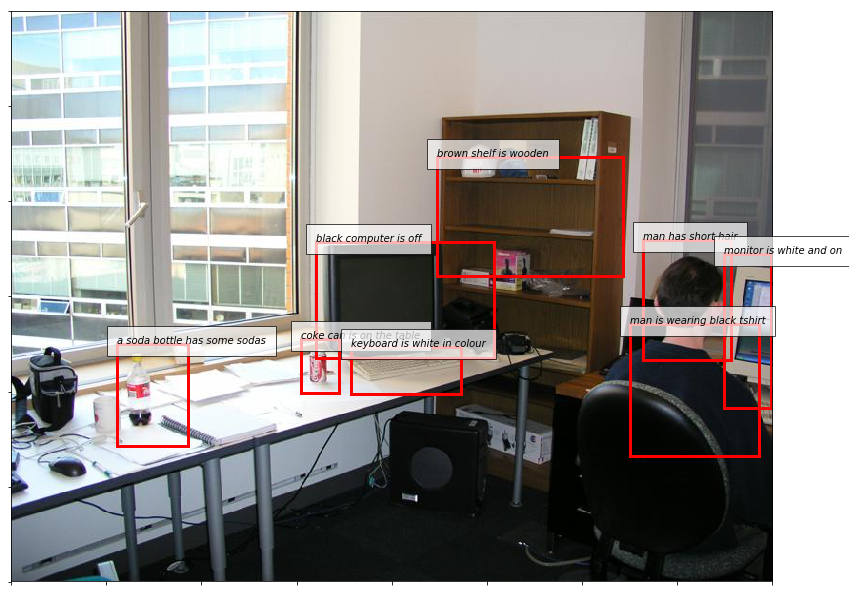

In [14]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
visualize_regions(image, regions[:8])